In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

Query Date:  2016-08-23


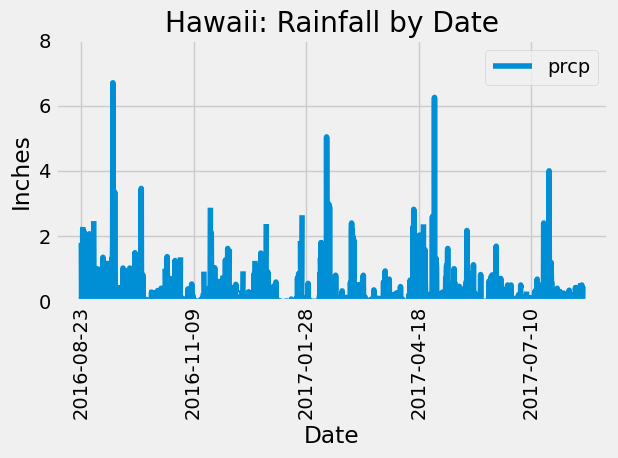

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the date and precipitation scores
prcp_scores = session.query(measurement.date, measurement.prcp).\
filter(measurement.date >= query_date).all()
prcp_scores

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
prcp_scores = pd.DataFrame(prcp_scores)
prcp_scores_df = prcp_scores.sort_values("date")
prcp_scores_df 

# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores_df.plot(title = "Hawaii: Rainfall by Date", x= 'date', y= 'prcp', rot=90)
plt.ylim(0,8)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_scores_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_number_stations = session.query(station).count()
total_number_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order
sel = [measurement.station, 
       func.count(measurement.date)]
active_stations = session.query(*sel).\
        group_by(measurement.station).\
        order_by(func.count(measurement.date).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station,
       func.min(measurement.tobs), 
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
station_temp_summary = session.query(*sel).\
        filter(measurement.station == 'USC00519281').\
        group_by(measurement.station)
for station in station_temp_summary:
    print(station)

('USC00519281', 54.0, 85.0, 71.66378066378067)


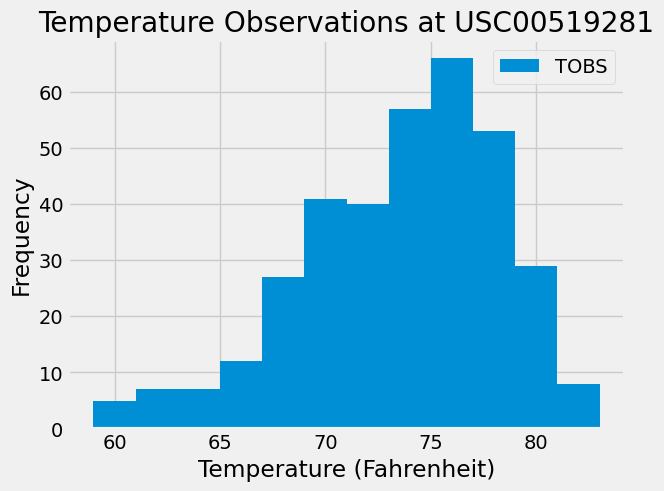

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
date = dt.date(2017,8,23) - dt.timedelta(days=365)
sel = [measurement.date, 
       measurement.tobs]
station_temps = session.query(*sel).\
        filter(func.strftime(measurement.date) >= date, measurement.station == 'USC00519281').\
        group_by(measurement.date).\
        order_by(measurement.date).all()

# Create a dataframe containing the results of this query
station_temps_df = pd.DataFrame(station_temps, columns=['measurement date', 'Temperature'])
station_temps_df.head()

# Plot the results as a histogram
plt.hist(station_temps_df['Temperature'],bins=12, density=False, label="TOBS")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Temperature Observations at USC00519281")
plt.figsize=(10,7)
plt.savefig('Annual_Temps_USC00519281.png',bbox_inches='tight')
plt.show()


# Close Session

In [16]:
# Close Session
session.close()
